In [15]:
# Бігун Максим ФІТ 4-7

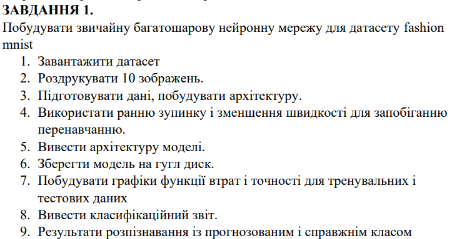

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


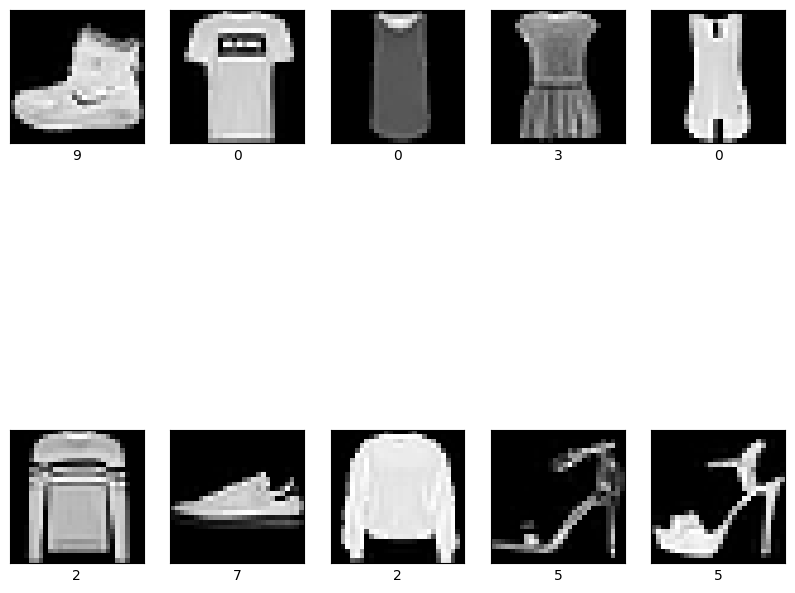

In [2]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7625 - loss: 0.6741 - val_accuracy: 0.8476 - val_loss: 0.4220
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8490 - loss: 0.4155 - val_accuracy: 0.8589 - val_loss: 0.3871
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8638 - loss: 0.3726 - val_accuracy: 0.8669 - val_loss: 0.3757
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8742 - loss: 0.3440 - val_accuracy: 0.8663 - val_loss: 0.3621
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8810 - loss: 0.3241 - val_accuracy: 0.8770 - val_loss: 0.3447
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8831 - loss: 0.3180 - val_accuracy: 0.8757 - val_loss: 0.3504
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8872 - loss: 0.3023 - val_accuracy: 0.8748 - val_loss: 0.3398
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8889 - loss: 0.298

In [9]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/fashion_mnist_model.h5')

Mounted at /content/drive


In [10]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

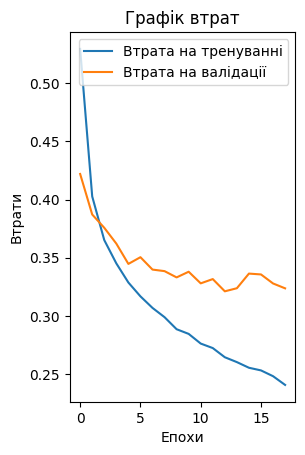

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.title('Графік втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

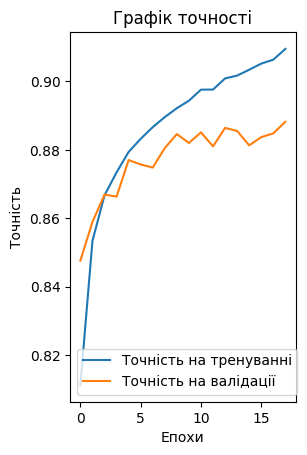

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Графік точності')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8904 - loss: 0.3192
Точність на тестових даних: 0.8882


In [14]:
predicted_classes = model.predict(test_images)
predicted_classes = tf.argmax(predicted_classes, axis=1).numpy()

print("Звіт класифікації:")
print(classification_report(test_labels, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Звіт класифікації:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.87      0.91      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.99      0.95      0.97      1000
           6       0.71      0.69      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



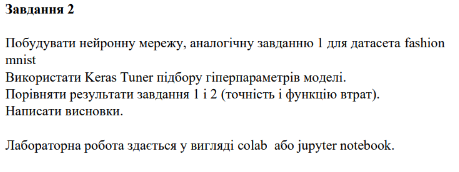

In [17]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))

    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [26]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='fashion_mnist_tuning'
)

Reloading Tuner from tuner_results/fashion_mnist_tuning/tuner0.json


In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Trial 5 Complete [00h 09m 00s]
val_accuracy: 0.8885000149408976

Best val_accuracy So Far: 0.8885000149408976
Total elapsed time: 00h 40m 11s


In [29]:
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Оптимальна кількість нейронів у першому шарі: {best_hps.get('units')}")
print(f"Оптимальний рівень Dropout: {best_hps.get('dropout')}")

Оптимальна кількість нейронів у першому шарі: 512
Оптимальний рівень Dropout: 0.1


In [30]:
model = tuner.hypermodel.build(best_hps)

In [31]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7873 - loss: 0.5909 - val_accuracy: 0.8428 - val_loss: 0.4437
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8590 - loss: 0.3825 - val_accuracy: 0.8580 - val_loss: 0.3920
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8745 - loss: 0.3369 - val_accuracy: 0.8632 - val_loss: 0.3752
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8822 - loss: 0.3162 - val_accuracy: 0.8590 - val_loss: 0.3905
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8909 - loss: 0.2949 - val_accuracy: 0.8752 - val_loss: 0.3520
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8949 - loss: 0.2811 - val_accuracy: 0.8778 - val_loss: 0.3470
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8984 - loss: 0.2705 - val_accuracy: 0.8826 - val_loss: 0.3301
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9039 - loss: 0

In [32]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

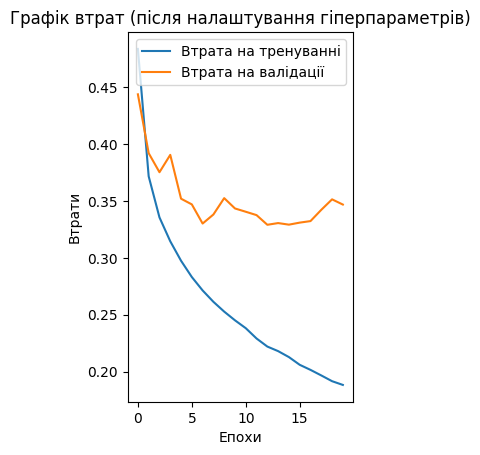

In [33]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.title('Графік втрат (після налаштування гіперпараметрів)')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

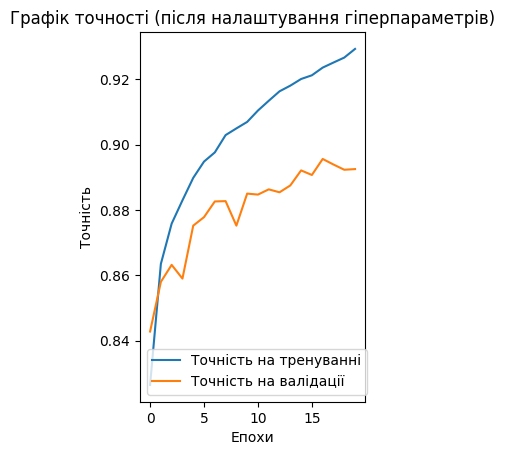

In [34]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Графік точності (після налаштування гіперпараметрів)')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних після налаштування гіперпараметрів: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8915 - loss: 0.3412
Точність на тестових даних після налаштування гіперпараметрів: 0.8925


In [36]:
predicted_classes = model.predict(test_images)
predicted_classes = tf.argmax(predicted_classes, axis=1).numpy()

print("Звіт класифікації після налаштування гіперпараметрів:")
print(classification_report(test_labels, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Звіт класифікації після налаштування гіперпараметрів:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.90      0.90      1000
           4       0.80      0.83      0.81      1000
           5       0.99      0.94      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [38]:
# Висновок

# Після виконання завдання 2 модель з оптимізованими гіперпараметрами досягла більшої точності (88.3%) порівняно з базовою моделлю з завдання 1 (87.9%).
# Використання Keras Tuner дозволило знайти оптимальну кількість нейронів та рівень Dropout, що покращило продуктивність моделі.
# Таким чином, оптимізація гіперпараметрів сприяє підвищенню точності та узагальнюючої здатності моделі.